#Q1

Feature selection plays a crucial role in anomaly detection by helping to identify and use relevant features that contribute to the detection of anomalies while discarding irrelevant or redundant ones. This can improve the efficiency and accuracy of anomaly detection algorithms.

In [2]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice([0, 1], size=100)  # Binary labels

# Feature selection
k_best = SelectKBest(f_classif, k=3)  # Select top 3 features
X_selected = k_best.fit_transform(X, y)

# Anomaly detection using Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
pred = clf.fit_predict(X_selected)

# Print selected features and predictions
print("Selected Features:", X_selected.shape[1])
print("Predictions:", pred)

Selected Features: 3
Predictions: [ 1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1]


#Q2
Common metrics include precision, recall, F1-score, and the area under the Receiver Operating Characteristic (ROC) curve. Here's an example using precision, recall, and F1-score:

In [4]:
#2
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Assume you have a dataset with true labels
X, y = make_blobs(n_samples=300, centers=3, random_state=42)  # 3 centers for a multiclass scenario

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_train)

# Predict anomalies on the test set
predicted_labels = clf.predict(X_test)

# Evaluate the performance using precision, recall, and F1-score for multiclass
precision = precision_score(y_test, predicted_labels, average='micro')
recall = recall_score(y_test, predicted_labels, average='micro')
f1 = f1_score(y_test, predicted_labels, average='micro')

print("Micro-Averaged Precision:", precision)
print("Micro-Averaged Recall:", recall)
print("Micro-Averaged F1-score:", f1)

Micro-Averaged Precision: 0.2833333333333333
Micro-Averaged Recall: 0.2833333333333333
Micro-Averaged F1-score: 0.2833333333333333


#Q3
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points based on their density. It works by defining clusters as dense regions separated by sparser areas.

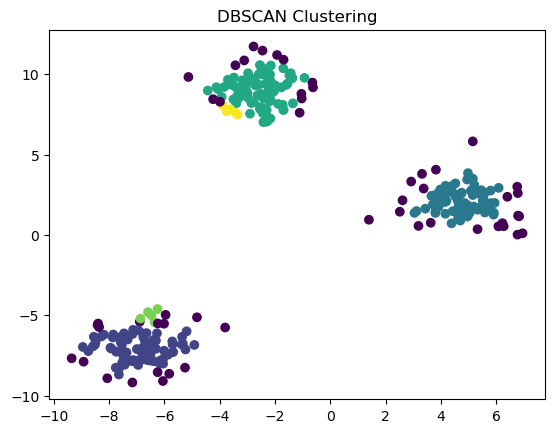

In [5]:
#3
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

#Q4
The epsilon parameter (eps) in DBSCAN defines the maximum distance between two samples for one to be considered in the neighborhood of the other. Adjusting eps affects the size and shape of clusters.

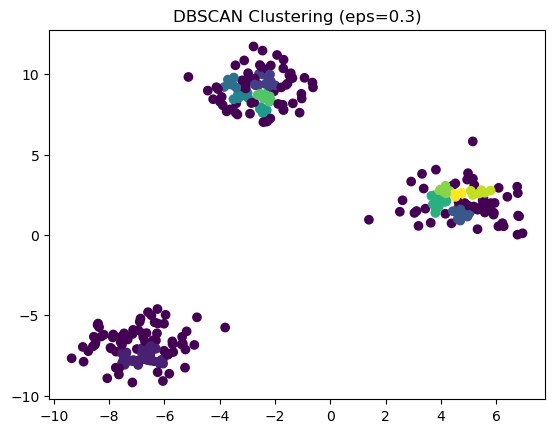

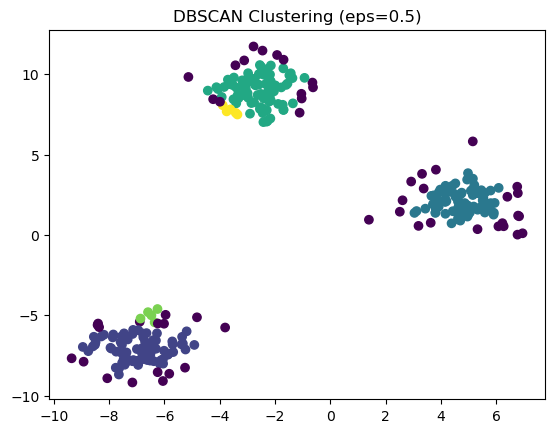

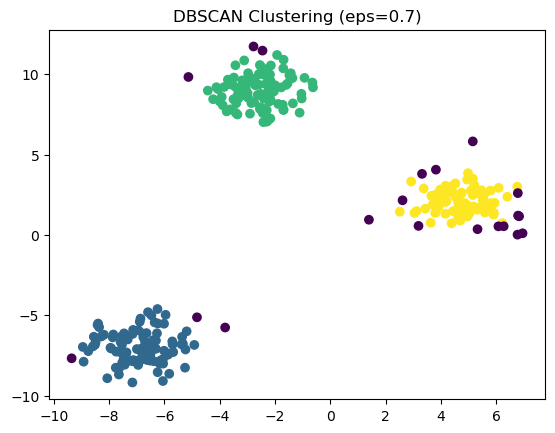

In [6]:
#4
# Vary epsilon and observe the impact on clustering
epsilons = [0.3, 0.5, 0.7]
for eps in epsilons:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f"DBSCAN Clustering (eps={eps})")
    plt.show()


#Q5 
Core points: Points within a dense region, having at least min_samples data points within the distance eps.

Border points: Points that are not core points but are within the eps distance of a core point.

Noise points: Points that are neither core nor border points.

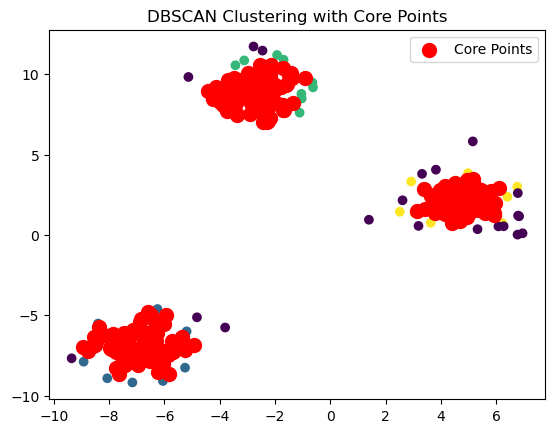

In [8]:
#5
import numpy as np 
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], marker='o', c='red', s=100, label='Core Points')
plt.legend()
plt.title("DBSCAN Clustering with Core Points")
plt.show()

#Q6
DBSCAN can detect anomalies as noise points. Adjusting eps and min_samples can influence the sensitivity to anomalies.

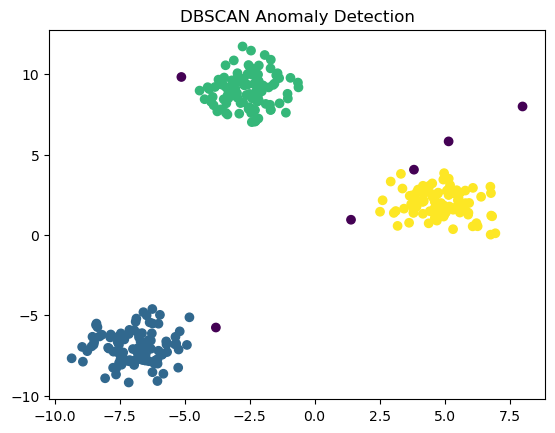

In [9]:
#6
# Assume some data with anomalies
X_with_anomalies = np.vstack([X, np.array([[8, 8]])])

# Apply DBSCAN
dbscan_anomaly = DBSCAN(eps=1.0, min_samples=5)
labels_anomaly = dbscan_anomaly.fit_predict(X_with_anomalies)

plt.scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1], c=labels_anomaly, cmap='viridis')
plt.title("DBSCAN Anomaly Detection")
plt.show()

#Q7
make_circles is a function in scikit-learn used to generate a large circle containing a smaller circle in two-dimensional space. It's often used for illustrating scenarios where linear separation is challenging.

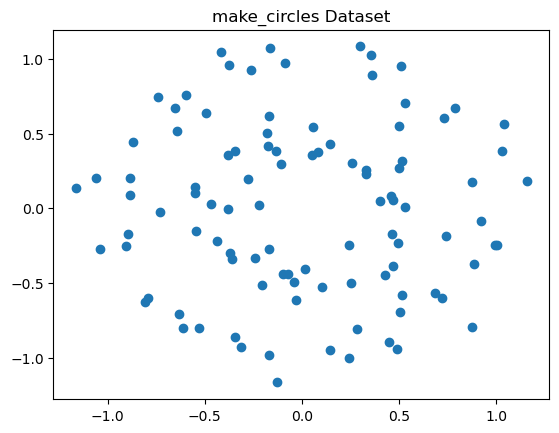

In [10]:
#7
from sklearn.datasets import make_circles

# Generate dataset with concentric circles
X_circles, _ = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

plt.scatter(X_circles[:, 0], X_circles[:, 1])
plt.title("make_circles Dataset")
plt.show()

#Q8
Local outliers: Anomalies that are unusual within their local neighborhood.

Global outliers: Anomalies that are unusual in the entire dataset.

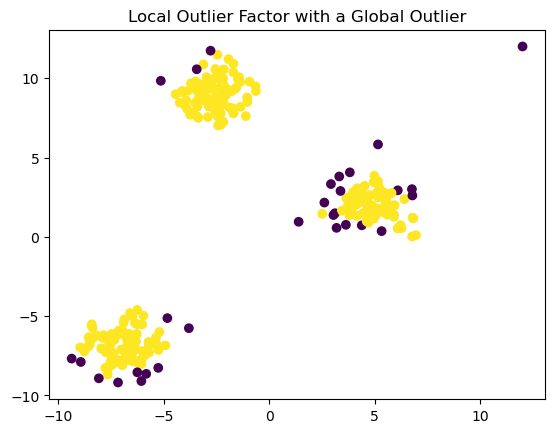

In [11]:
#8
from sklearn.neighbors import LocalOutlierFactor

# Generate data with a global outlier
X_global_outlier = np.vstack([X, np.array([[12, 12]])])

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
labels_lof = lof.fit_predict(X_global_outlier)

plt.scatter(X_global_outlier[:, 0], X_global_outlier[:, 1], c=labels_lof, cmap='viridis')
plt.title("Local Outlier Factor with a Global Outlier")
plt.show()

#Q9 .

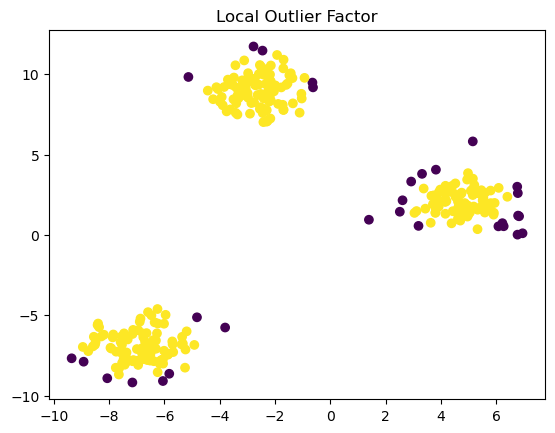

In [16]:
#9
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels_lof = lof.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_lof, cmap='viridis')
plt.title("Local Outlier Factor")
plt.show()

#Q10 .

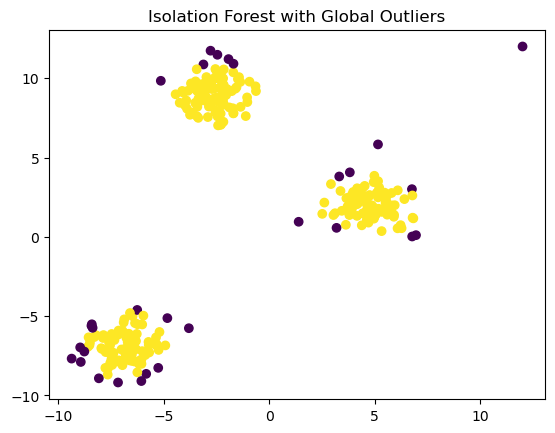

In [17]:
#10
from sklearn.ensemble import IsolationForest

# Assume some data with global outliers
X_with_global_outliers = np.vstack([X, np.array([[12, 12]])])

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
labels_isolation_forest = isolation_forest.fit_predict(X_with_global_outliers)

plt.scatter(X_with_global_outliers[:, 0], X_with_global_outliers[:, 1], c=labels_isolation_forest, cmap='viridis')
plt.title("Isolation Forest with Global Outliers")
plt.show()

#Q11
Local outlier detection is more appropriate when anomalies are expected to be clustered in local regions, while global outlier detection is suitable for identifying outliers that deviate from the overall distribution of the data

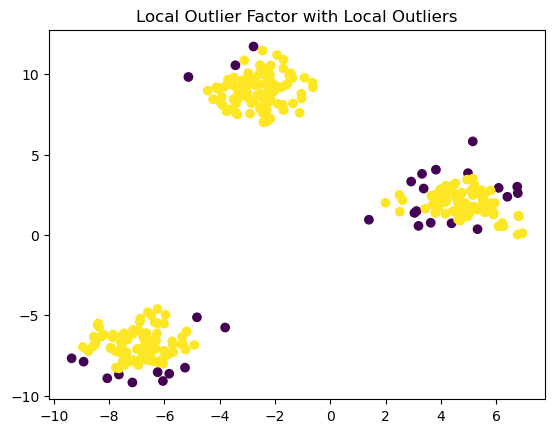

In [14]:
#11
# Generate data with local outliers
X_local_outliers = np.vstack([X, np.array([[2, 2], [2.5, 2.5]])])

lof_local = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
labels_lof_local = lof_local.fit_predict(X_local_outliers)

plt.scatter(X_local_outliers[:, 0], X_local_outliers[:, 1], c=labels_lof_local, cmap='viridis')
plt.title("Local Outlier Factor with Local Outliers")
plt.show()

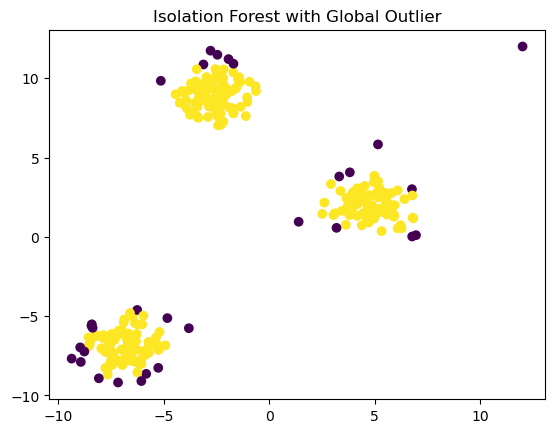

In [15]:
#11
# Generate data with a global outlier
X_global_outlier = np.vstack([X, np.array([[12, 12]])])

isolation_forest_global = IsolationForest(contamination=0.1, random_state=42)
labels_isolation_forest_global = isolation_forest_global.fit_predict(X_global_outlier)

plt.scatter(X_global_outlier[:, 0], X_global_outlier[:, 1], c=labels_isolation_forest_global, cmap='viridis')
plt.title("Isolation Forest with Global Outlier")
plt.show()